In [88]:
import pandas as pd
import math
import numpy as np
import keras

In [89]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/finalProj/card_transdata.csv")
dataset.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [91]:
X = dataset.drop(['fraud'], axis=1)
y = dataset.fraud

In [92]:
# Scale X
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [93]:
y.value_counts() #stratify

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [95]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0, max_iter=100, n_jobs=5, verbose=0)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.959085

In [96]:
y_pred_lr = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  0.040915
Mean absolute error on test data:  0.040915


In [97]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=0)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

0.999965

In [98]:
y_pred_rf = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error on test data: ', mse_rf)
print('Mean absolute error on test data: ', mae_rf)

Mean squared error on test data:  3.5e-05
Mean absolute error on test data:  3.5e-05


In [99]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.99997

In [100]:
y_pred_dt = decision_tree.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)

Mean squared error on test data:  3e-05
Mean absolute error on test data:  3e-05


In [101]:
# Support Vector Classifier

from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0, max_iter=100)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.95076

In [102]:
y_pred_svc = svc.predict(X_test)

mse_svc = mean_squared_error(y_test, y_pred_svc)
mae_svc = mean_absolute_error(y_test, y_pred_svc)
print('Mean squared error on test data: ', mse_svc)
print('Mean absolute error on test data: ', mae_svc)

Mean squared error on test data:  0.04924
Mean absolute error on test data:  0.04924


In [103]:
# MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0, activation='relu', solver='adam', max_iter=100)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.99896

In [104]:
y_pred_mlp = mlp.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
print('Mean squared error on test data: ', mse_mlp)
print('Mean absolute error on test data: ', mae_mlp)

Mean squared error on test data:  0.00104
Mean absolute error on test data:  0.00104


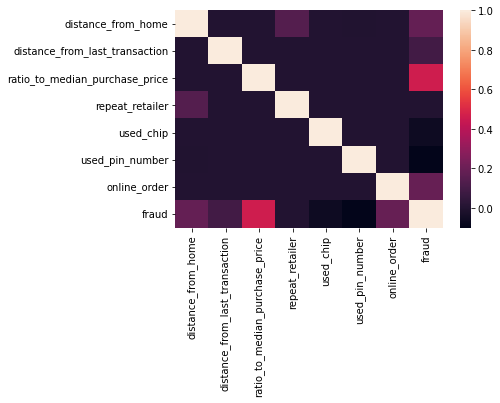

In [105]:
#Decision Tree Classifier has highest score, use.
#Correlations
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataset.corr())
plt.show()
#Most prominent values relating to fraud show as distance from home, distance from last transaction, online order. 
#The greatest showing as the ratio to median purchas price.

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
#LR
print(confusion_matrix(y_test, y_pred_lr))

[[181283   1236]
 [  6947  10534]]


In [112]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.89      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [107]:
#RF
print(confusion_matrix(y_test, y_pred_rf))

[[182518      1]
 [     6  17475]]


In [108]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [109]:
#DT
print(confusion_matrix(y_test, y_pred_dt))

[[182517      2]
 [     4  17477]]


In [110]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [114]:
#SVC
print(confusion_matrix(y_test, y_pred_svc))

[[181619    900]
 [  8948   8533]]


In [115]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    182519
         1.0       0.90      0.49      0.63     17481

    accuracy                           0.95    200000
   macro avg       0.93      0.74      0.80    200000
weighted avg       0.95      0.95      0.94    200000



In [116]:
#MLP
print(confusion_matrix(y_test, y_pred_mlp))

[[182403    116]
 [    92  17389]]


In [118]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

